<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget

### Downloading the Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [3]:
filename = wget.download(URL, out='dataset.csv')

100% [............................................................................] 910928 / 910928

---


# Importing the Dataset

## Prompt

Write a Python code that can perform the following tasks:
1. Read the CSV file, named dataset.csv, into a pandas data frame, called df.
2. Assume that the first row of the file can be used as the headers for the data.
3. Print the first 5 rows of the dataframe to verify correct loading.

## Generated Code

In [4]:
import pandas as pd

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('dataset.csv')

# Step 2: Print the first 5 rows of the DataFrame
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


# Data Preparation

## Prompt

Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values identified with the mean value of the column.
3. Deletes the duplicate entries from the data frame.

## Generated Code

In [5]:
import pandas as pd

# Step 1: Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_columns}")

# Step 2: Replace missing values with the mean value of the column
for column in missing_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
    print(f"Replaced missing values in '{column}' with mean value: {mean_value}")

# Step 3: Delete duplicate entries from the DataFrame
initial_row_count = df.shape[0]
df.drop_duplicates(inplace=True)
final_row_count = df.shape[0]

print(f"Removed {initial_row_count - final_row_count} duplicate entries.")

Columns with missing values: ['tax']
Replaced missing values in 'tax' with mean value: 113.3291766408729
Removed 154 duplicate entries.


# Data Insights and Visualization

## Identify the 5 attributes that have the highest correlation with the price parameter.

### Prompt

Write a python code that identifies the top 5 attributes with highest correlation with the `price` attribute in a data frame.

### Generated Code

In [6]:
import pandas as pd

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Step 2: Get the correlations with the target attribute
target_correlations = correlation_matrix['price'].abs().sort_values(ascending=False)

# Step 3: Identify the top 5 attributes with the highest correlation
top_5_attributes = target_correlations[1:6]  # Exclude the target attribute itself
print("Top 5 attributes with highest correlation with the target attribute:")
print(top_5_attributes)

Top 5 attributes with highest correlation with the target attribute:
year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


## Count the number of cars under each unique value of fuelType attribute.

### Prompt

Write a python code that counts the number of entries in a dataframe with each unique value of a `fuelType` attribute.

### Generated Code

In [7]:
import pandas as pd

# Count the number of entries for each unique value of the 'fuelType' attribute
fuel_type_counts = df['fuelType'].value_counts()

# Print the counts
print("Counts of entries for each unique value of 'fuelType':")
print(fuel_type_counts)

Counts of entries for each unique value of 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


## Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

### Prompt

Write a python code that creates a Seaborn box plot between the source attribute `transmission` and the target attribute `price` of the dataframe.

### Generated Code

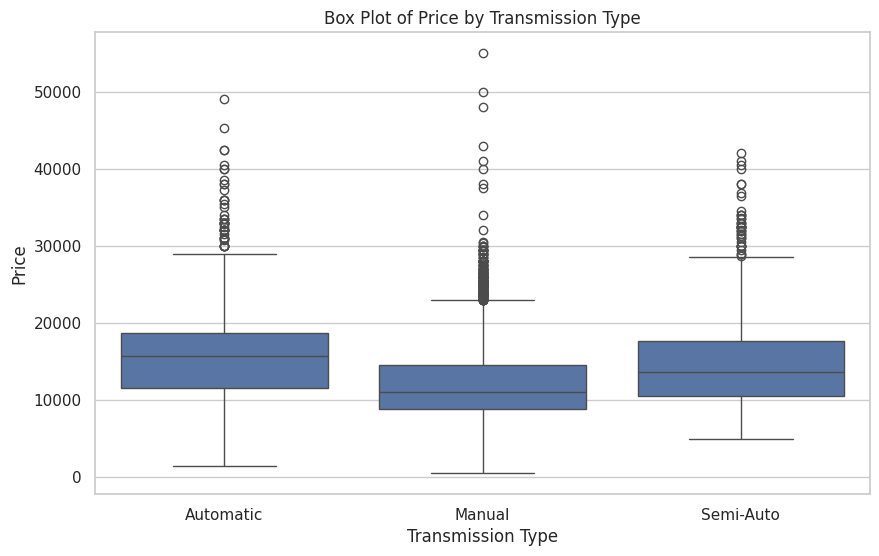

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot between 'transmission' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='transmission', y='price')

# Add titles and labels
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')

# Show the plot
plt.show()

## Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

### Prompt

Write a python code that creates a regression plot between the source attribute `mpg` and the target attribute `price` of the dataframe.

### Generated Code

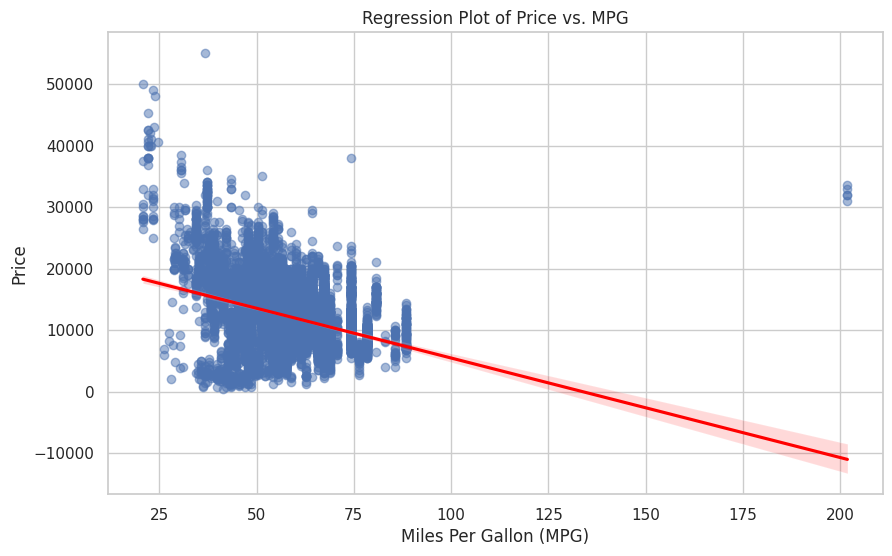

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a regression plot between 'mpg' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='mpg', y='price', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Regression Plot of Price vs. MPG')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Price')

# Show the plot
plt.show()

# Model Development and Evaluation

## Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

### Prompt

Write a python code to fit a linear regression model on the target variable `price` on basis of the source variable `mpg`. Calculate the R^2 values and MSE values for this model.

### Generated Code

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = df[['mpg']]  # Feature
y = df['price']  # Target variable

# Step 3: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Make predictions on the test set
y_pred = model.predict(X)

# Step 5: Calculate R^2 and MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f"R^2 Value: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Value: 0.11989802249624182
Mean Squared Error (MSE): 19741690.80944619


## Fit a linear regression model to predict the price using year, mileage, tax, mpg, and engineSize. Also, calculate the R^2 and MSE values for this model.

### Prompt

Write a python code to fit a linear regression model on a target variable `price` on basis of a set of source variables `year`, `mileage`, `tax`, `mpg`, and `engineSize`. Calculate the R^2 values and MSE values for this model.

### Generated Code

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Step 3: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Make predictions on the test set
y_pred = model.predict(X)

# Step 5: Calculate R^2 and MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f"R^2 Value: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Value: 0.7265379654546995
Mean Squared Error (MSE): 6134065.224381753


## For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

### Prompt

Write a python code that can perform the following tasks.

1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable `price` using a set of source attributes `year`, `mileage`, `tax`, `mpg`, and `engineSize`, from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model.

### Generated Code

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Step 3: Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                     # Standard scaling
    ('poly_features', PolynomialFeatures(degree=2)),  # Second-degree polynomial features
    ('model', LinearRegression())                     # Linear regression model
])

# Step 4: Fit the pipeline on the training data
pipeline.fit(X, y)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X)

# Step 6: Calculate R^2 and MSE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f"R^2 Value: {r_squared}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 Value: 0.7666619695239302
Mean Squared Error (MSE): 5234038.06546274


## For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

### Prompt

Write a python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a dataframe are source attributes (`year`, `mileage`, `tax`, `mpg`, and `engineSize`) and one of the attributes is a target attribute (`price`), split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

### Generated Code

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Select the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit a Ridge regression model with a regularization parameter of 0.1
ridge_model = Ridge(alpha=0.1)  # Set the regularization parameter
ridge_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Step 5: Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Value: {r_squared}")

Mean Squared Error (MSE): 6912725.801054859
R^2 Value: 0.6917134446113167


## Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

### Prompt

Write a python code that can perform the following tasks.
1. Assuming that a subset of the attributes of a dataframe are source attributes (`year`, `mileage`, `tax`, `mpg`, and `engineSize`) and one of the attributes is a target attribute (`price`), split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

### Generated Code

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the DataFrame (assuming it has already been loaded into df)
# df = pd.read_csv('dataset.csv')  # Uncomment this line if you need to load the data

# Step 1: Select the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline for polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Second degree polynomial features
    ('scaler', StandardScaler()),                     # Standard scaling
    ('ridge', Ridge(alpha=0.1))                       # Ridge regression model
])

# Step 4: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Value: {r_squared}")

Mean Squared Error (MSE): 6919635.718803026
R^2 Value: 0.69140528328655


## In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

### Prompt

Write a python code that can perform the following tasks.
1. Assuming that a subset of the attributes of a dataframe are source attributes (`year`, `mileage`, `tax`, `mpg`, and `engineSize`) and one of the attributes is a target attribute (`price`), split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for the following set of values:
    - alpha: 0.01, 0.1, 10, 100
    - cross-validation: 4
5. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data.

### Generated Code

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Step 1: Select the features and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']                                          # Target variable

# Step 2: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline for polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Second degree polynomial features
    ('scaler', StandardScaler()),                     # Standard scaling
    ('ridge', Ridge())                                # Ridge regression model
])

# Step 4: Set up the parameter grid for alpha values
param_grid = {
    'ridge__alpha': [0.01, 0.1, 10, 100]  # Set of alpha values to try
}

# Step 5: Create a GridSearchCV object with 4-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)

# Step 6: Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Step 7: Get the best model from grid search
best_model = grid_search.best_estimator_

# Step 8: Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Step 9: Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Best alpha value: {grid_search.best_params_['ridge__alpha']}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Value: {r_squared}")

Best alpha value: 0.01
Mean Squared Error (MSE): 8943742.343193403
R^2 Value: 0.6011362813137677


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
